In [19]:
import xgboost as xgb
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

In [16]:
# Loading the Data
x_train = pd.read_csv("data/X_train.csv")
x_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

In [17]:
# Define XGBoost parameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [18]:
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model
y_pred = best_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the best model
joblib.dump(best_model, 'best_xgboost_model.pkl')

print("Best model saved successfully."),

Classification Report (Adversarial Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Best adversarial model saved successfully.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56850    13]
 [   22 56841]]


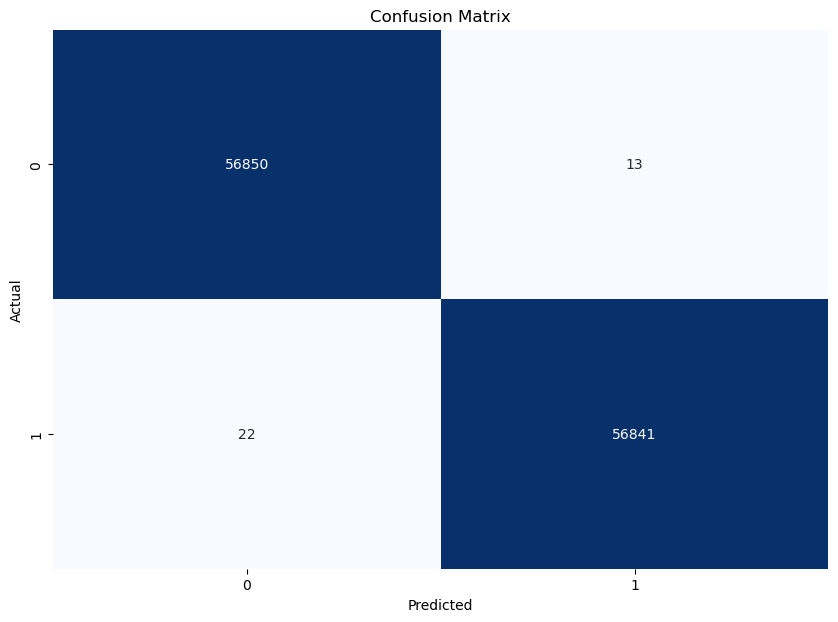

ROC AUC Score: 0.9999781771561767


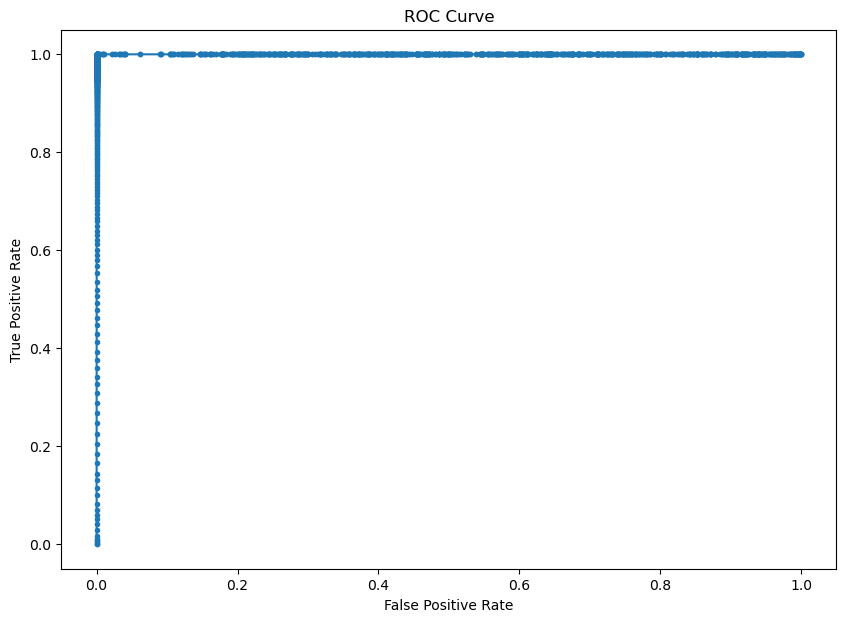

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
x_train = pd.read_csv("data/X_train.csv")
x_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

# Ensure labels are properly formatted
y_train_np = y_train.squeeze().values
y_test_np = y_test.squeeze().values

# Load the XGBoost model from .pkl file
with open('best_xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Make predictions using the pandas DataFrame directly
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute metrics
print("Classification Report:")
print(classification_report(y_test_np, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_np, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_test_np, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()